# GRADED PROJECT 2 (Group G2B5)


##  Project Objective:
Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.


## Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)

## Attribute Information

In [2]:
# Create a DataFrame with attribute information
attribute_info = pd.DataFrame({
    'Attribute': ['user_id', 'item_id', 'weight', 'rented for', 'body type', 'review_text', 'size', 'rating', 'age', 'category', 'bust size', 'height', 'review_date', 'fit'],
    'Description': ['a unique id for the customer', 'unique product id', 'weight measurement of customer', 'purpose clothing was rented for', 'body type of customer', 'review given by the customer', 'the standardized size of the product', 'rating for the product', 'age of the customer', 'the category of the product', 'bust measurement of customer', 'height of the customer', 'date when the review was written', 'fit feedback']
})

attribute_info

,Attribute,Description
0,user_id,a unique id for the customer
1,item_id,unique product id
2,weight,weight measurement of customer
3,rented for,purpose clothing was rented for
4,body type,body type of customer
5,review_text,review given by the customer
6,size,the standardized size of the product
7,rating,rating for the product
8,age,age of the customer
9,category,the category of the product


## ● Import the required libraries and load the data:
### 1. Load the required libraries and read the dataset.

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [4]:
# reading the dataset

try:
    df = pd.read_csv('renttherunway.csv', index_col=0)
except FileNotFoundError: # if file path is invalid of the file does not exist
    print("File not found.")
except pd.errors.EmptyDataError: # if the file is empty or has no data
    print("No data")
except pd.errors.ParserError: # if the file has malformed or invalid data that cannot be parsed.
    print("Parse error")
except UnicodeDecodeError: # if the file has a different encoding than the default or specified one.
    print("Encoding error")
except Exception: # handling other exceptions
    print("Error encountered! Please review your code")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [5]:
# first few samples : 

df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [6]:
# general infromation about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192476 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192197 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 23.5+ MB


In [7]:
# number of unique entries in each attribute
df.nunique()

fit                    3
user_id           105571
bust size            106
item_id             5850
weight               190
rating                 5
rented for             9
review_text       191026
body type              7
review_summary    154735
category              68
height                24
size                  56
age                   89
review_date         2274
dtype: int64

### Observations:
- There are 15 columns and at most 192544 rows in the dataset. Some records seem to be missing in case of some attibutes.
- This dataset contains atributes of different datatypes:
    - float64 : 2 columns
    - int64 : 4 columns
    - object/string : 10 columns 
- The number of unique values in each attribute is varied. Some arrtibutes like 'user_id', 'review_text', 'review_summary' seem to have a high number of unique values. The number of unique values in other attributes is less

### 3. Check if there are any duplicate records in the dataset? If any, drop them

In [8]:
# checking for duplicated records in the dataset
df.duplicated().sum()

189

- There are some duplicate records in the dataset
- These records need to be dropped

In [9]:
# Checking for duplicate records
duplicate_records = df[df.duplicated()]

if not duplicate_records.empty:
    print("Duplicate records found. Dropping duplicates...")
    # Dropping duplicate records
    df = df.drop_duplicates()
    print("Duplicates dropped. Updated shape of the data:", df.shape)
else:
    print("No duplicate records found.")

Duplicate records found. Dropping duplicates...
Duplicates dropped. Updated shape of the data: (192355, 15)


### 4. Drop the columns which you think redundant for the analysis.

- Based on the given project objective of segmenting users and items for an e-commerce company, here are some columns that might be considered redundant:

    - <b>user_id and item_id</b>: These columns provide unique identifiers for users and items, which may not be directly relevant for segmentation analysis. However, they may still be useful for tracking and referencing purposes.

    - <b>review_text, review_summary and review_date</b>: While customer reviews, their summaries and their dates could provide valuable insights, they might not be necessary for initial segmentation analysis, especially if sentiment analysis or temporal analysis is not a primary focus.

In [10]:
# list of columns to drop
drop_cols = ['user_id', 'item_id', 'review_text', 'review_summary', 'review_date']

# dropping the redundannr columns
df = df.drop(columns = drop_cols)

# checking if the columns are dropped or not
all_removed = True
for col_name in drop_cols:
    if col_name in df.columns:
        all_removed = False
        break
        
if all_removed:
    print("The columns have been removed.")
else:
    print("The columns have not been removed.")

The columns have been removed.


### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float.

In [11]:
def convert_weight_to_float(weight):
    try:
        # Convert weight to string
        weight_str = str(weight)
        # Remove "lbs" suffix and convert to float
        weight_float = float(weight_str.replace("lbs", ""))
        return weight_float
    except ValueError:
        # If the conversion fails, return NaN
        return float('nan')

# Apply the function to the 'Weight' column to remove the suffix and convert to float
df['weight'] = df['weight'].apply(convert_weight_to_float)

In [12]:
# check ramdom records for the column
df['weight'].sample(5)

71731     117.0
173661    102.0
40817     130.0
119942    175.0
42567     175.0
Name: weight, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'.

In [13]:
# Check unique categories in the 'rented for' column
unique_categories = df['rented for'].unique()

# Display the unique categories before grouping
print("Unique categories before grouping:")
print(unique_categories)

Unique categories before grouping:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']


In [14]:
# Group 'party: cocktail' category with 'party'
df['rented for'] = df['rented for'].replace('party: cocktail', 'party')

# Verify unique categories after grouping
unique_categories_after_grouping = df['rented for'].unique()

# Display the unique categories after grouping
print("\nUnique categories after grouping:")
print(unique_categories_after_grouping)


Unique categories after grouping:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan]


### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype

In [15]:
# define function to convert 'heaight' to folat datatype
def convert_height_to_dec(height):
    try:
        if pd.isnull(height):  # If the value is NaN, return NaN 
            return height
        height_str = str(height)  # Convert height to string
        if "'" and '"' in height_str:
            height_str = height_str.replace('"', "")
            feet, inches = height_str.split("'")
            # 1 feet = 12 inches
            total_inches = int(feet) * 12 + int(inches)
            height_in_decimal = total_inches / 12
        else:
            # If the value doesn't contain "'", assume it's already in decimal format
            height_in_decimal = float(height_str)
    except Exception as e:
        # If any error occurs during conversion, return NaN
        height_in_decimal = float('nan')
    return height_in_decimal

In [16]:
# Apply the function to the 'height' column to convert it to decimal feet
df['height'] = df['height'].apply(convert_height_to_dec)

# sample 'height' records
df['height'].sample(5)

179405    5.000000
48751     5.500000
83820     5.583333
100764    5.833333
60341     5.416667
Name: height, dtype: float64

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [17]:
# Calculating the percentage of missing values in each column
missing_percentage = df.isna().mean() * 100

# Print the percentage of missing values for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
fit            0.000000
bust size      9.561488
weight        15.572769
rating         0.042110
rented for     0.005199
body type      7.603130
category       0.000000
height         0.350914
size           0.000000
age            0.499077
dtype: float64


- The percentage of missing values in almost all columns are not high and can be imputed using the proper imputation techniques
- The columns will be differentiated on the basis of type of the variable(numercial or categorical) and if they have missing values or not. Then, the respective imputation techniques will be applied to fill the missing records

In [18]:
# Imputation techniques by filtering columns based on type and presence of null values
# Filter columns with null values
columns_with_null = df.columns[df.isnull().any()]

# Filter null columns based on their data types
numerical_columns = df[columns_with_null].select_dtypes(include=['number']).columns
categorical_columns = df[columns_with_null].select_dtypes(include=['object']).columns

# Convert numerical columns to float64 to allow for decimal values
df[numerical_columns] = df[numerical_columns].astype('float64')

# Impute missing values for numerical columns with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Impute missing values for categorical columns with mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check if any missing values remain
print("Remaining missing values after imputation:")
print(df.isnull().sum())

Remaining missing values after imputation:
fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64


- All columns have been successfully impputed and there are no more missing values in the dataset 

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [19]:
# Statistical summary for numerical columns
numerical_summary = df.describe().T
print('The statistical summary of numerical columns :')
numerical_summary

The statistical summary of numerical columns :


,count,mean,std,min,25%,50%,75%,max
weight,192355.0,137.019875,20.143567,50.0,125.00,135.000000,145.000000,300.0
rating,192355.0,9.092709,1.429922,2.0,8.00,10.000000,10.000000,10.0
height,192355.0,5.442445,0.221579,4.5,5.25,5.416667,5.583333,6.5
size,192355.0,12.245801,8.496299,0.0,8.00,12.000000,16.000000,58.0
age,192355.0,33.860633,8.039386,0.0,29.00,32.000000,37.000000,117.0


### Based on the statistical summary of numerical columns, here are some insights that can be derived:

1. Weight:
    - The mean weight of customers is approximately 137.02 lbs, with a standard deviation of approximately 20.14 lbs.
      This indicates that the weights of customers vary around the mean by about 20.14 lbs on average.
    - The minimum weight observed is 50.0 lbs, and the maximum weight observed is 300.0 lbs, suggesting a wide range 
      of weights among customers.
    - The mean is greater than the median(135.000000) suggestiong some postive or right skew in the distribution of 'weight'.
    - The majority of customers (approximately 50%) have weights between 125.0 lbs (25th percentile) and 145.0 lbs 
      (75th percentile), as indicated by the interquartile range.

2. Rating:
    - The mean rating for products is approximately 9.09 out of 10, with a standard deviation of approximately 1.43. 
      This suggests that, on average, customers rate the products highly.
    - The minimum rating observed is 2.0, and the maximum rating observed is 10.0, indicating a wide range of ratings 
      provided by customers.
    - The mean is slightly lesser than the median(10.0). Suggesting a slight left/negative-skew in the distribution of 'rating'.
    - Most ratings (approximately 75%) fall within the range of 8.0 (25th percentile) and 10.0 (75th percentile), 
      as indicated by the IQR.

3. Height:
    - The mean height of customers is approximately 5.44 feet (or 65.31 inches), with a standard deviation of approximately 
      0.22 feet (or 2.67 inches). This suggests that the heights of customers vary around the mean by about 0.22 feet 
      on average.
    - The minimum height observed is 4.5 feet (or 54 inches), and the maximum height observed is 6.5 feet 
      (or 78 inches), indicating a range of heights among customers.
    - The majority of customers (approximately 50%) have heights between 5.25 feet (or 63 inches) and 5.58 feet 
      (or 67 inches), as indicated by the IQR.
    - The mean and median for 'rating' are almost same (5.4) suggesting an almost evenly spread distribution.

4. Size:

    - The mean size of products rented by customers is approximately 12.25, with a standard deviation of approximately 
      8.50. This suggests that there is some variability in the sizes of products rented by customers.
    - The minimum size observed is 0, and the maximum size observed is 58, indicating a wide range of sizes for the products.
    - Most sizes (approximately 75%) fall within the range of 8.0 (25th percentile) and 16.0 (75th percentile), as indicated 
      by the IQR.
    - The mean and median for 'size' are almost same (12) suggesting an almost evenly spread distribution.
    
5. Age:
    - The mean age of customers is approximately 33.86 years, with a standard deviation of approximately 8.04 years. 
       This suggests that the ages of customers vary around the mean by about 8.04 years on average.
    - The minimum age observed is 0 years, and the maximum age observed is 117 years, indicating a wide range of ages 
      among customers.
    - The majority of customers (approximately 50%) have ages between 29 years (25th percentile) and 37 years 
      (75th percentile), as indicated by the IQR.
    - There is some postivie skew in the data for 'age'
    
#### These insights provide a better understanding of the distribution and characteristics of the numerical variables in the dataset. They can be used to tailor marketing strategies, product offerings, and customer experiences to better meet the needs and preferences of different customer segments.

In [20]:
# Statistical summary for categorical columns
categorical_summary = df.describe(include=['object']).T
print('The statistical summary of categorical columns :')
categorical_summary

The statistical summary of categorical columns :


,count,unique,top,freq
fit,192355,3,fit,141909
bust size,192355,106,34b,45647
rented for,192355,8,wedding,57747
body type,192355,7,hourglass,69915
category,192355,68,dress,92752


### Based on the provided statistical summary of categorical columns, here are some insights and inferences that can be derived:

1. Fit:
    - There are three unique values for the "fit" column: "fit", "small", and "large".
    - The most frequent value is "fit", which occurs 141,909 times out of 192,355 records.
    - This suggests that the majority of customers perceive the clothing items they rent as fitting well.
    
2. Bust Size:
    - There are 106 unique values for the "bust size" column, indicating a wide variety of bust sizes among customers.
    - The most frequent bust size is "34b", occurring 45,647 times out of 192,355 records.
    - This provides insight into the distribution of bust sizes among customers, with "34b" being the most common size.

3. Rented For:
    - There are eight unique values for the "rented for" column, representing different purposes for which customers 
      rent clothing items.
    - The most common reason for renting clothing items is "wedding", which occurs 57,747 times out of 192,355 records.
    - This suggests that weddings are a significant occasion for which customers often rent clothing items.
    
4. Body Type:
    - There are seven unique values for the "body type" column, representing different body types of customers.
    - The most frequent body type is "hourglass", occurring 69,915 times out of 192,355 records.
    - This provides insight into the diversity of body types among customers, with "hourglass" being the most common type.
    
5. Category:
    - There are 68 unique values for the "category" column, indicating a wide range of product categories available for rent.
    - The most common category is "dress", which occurs 92,752 times out of 192,355 records.
    - This suggests that dresses are the most popular type of clothing item rented by customers.
    
#### These insights provide valuable information about the preferences, behaviors, and demographics of customers using the rental service. Additionally, it can help identify trends and patterns in customer behavior, leading to more targeted and effective business decisions.

### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

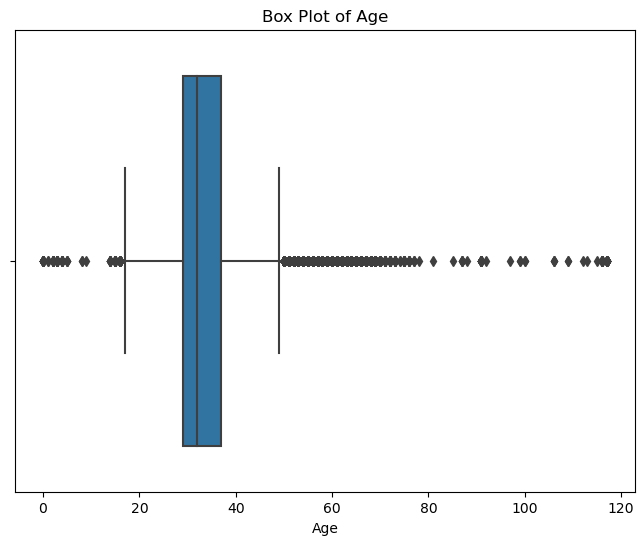

In [21]:
# Plotting a box plot for the 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

- The plot suggests there is presence of outliers in 'age' attribute. These outliers can be treated using the various methods : IQR method, Z-score method, log transformation, square root and cube root transformations, winsorization etc.
- Here, we will be employing the IQR method to 

In [22]:
# calculating the first and the third quartiles. IQR = Q3 - Q1
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
# Inter Quartile Range
IQR = Q3 - Q1

# calculation upper and lower whishers
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

# Remove the outliers from the DataFrame - data points lying lower than the lower whisker and higher than the upper whisker
df = df[~((df['age'] < lower_limit) | (df['age'] > upper_limit))]

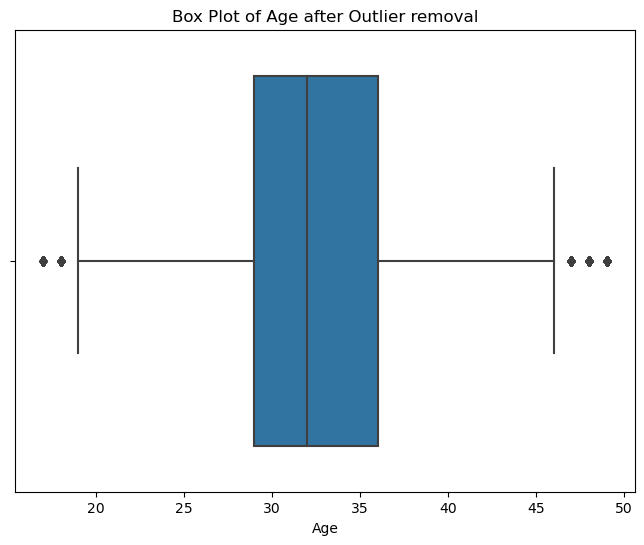

In [23]:
# Plotting a box plot for the 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age after Outlier removal')
plt.xlabel('Age')
plt.show()

- The Outliers have been removed

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

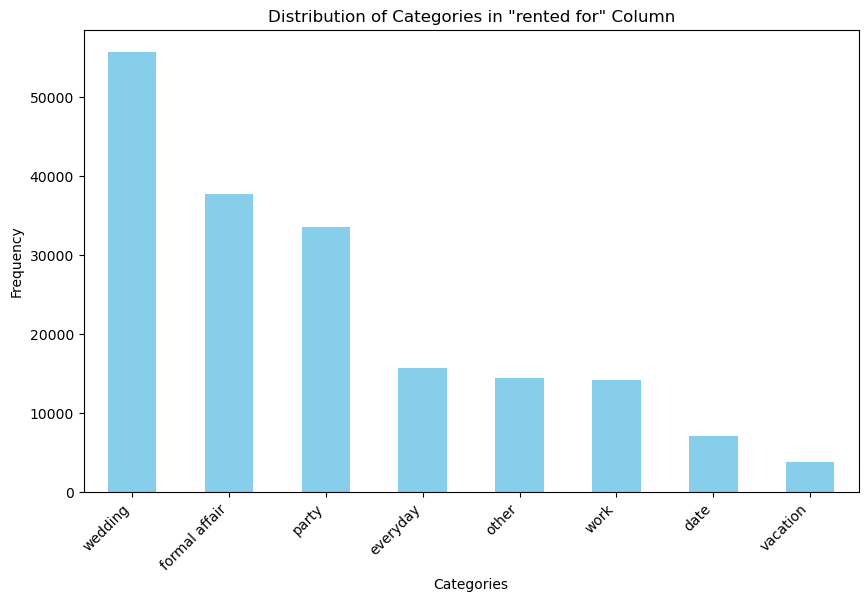

In [24]:
# Plotting the distribution of 'rented for' categories
plt.figure(figsize=(10, 6))
df['rented for'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories in "rented for" Column')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## ● Data Preparation for model building:

In [25]:
# Keep a copy of the cleaned dataset (we will use it to assign the cluster labels and will analyze the clusters formed)
df_copy = df.copy()
df_copy.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,5.666667,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,5.500000,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,5.416667,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,5.750000,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,5.666667,8,45.0


### 12. Encode the categorical variables in the dataset

In [26]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables using LabelEncoder
df['fit_encoded'] = label_encoder.fit_transform(df['fit'])
df['bust_size_encoded'] = label_encoder.fit_transform(df['bust size'])
df['rented_for_encoded'] = label_encoder.fit_transform(df['rented for'])
df['body_type_encoded'] = label_encoder.fit_transform(df['body type'])
df['category_encoded'] = label_encoder.fit_transform(df['category'])

df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,fit_encoded,bust_size_encoded,rented_for_encoded,body_type_encoded,category_encoded
0,fit,34d,137.0,10.0,vacation,hourglass,romper,5.666667,14,28.0,0,39,5,3,44
1,fit,34b,132.0,10.0,other,straight & narrow,gown,5.500000,12,36.0,0,37,3,6,20
3,fit,34c,135.0,8.0,formal affair,pear,dress,5.416667,8,34.0,0,38,2,4,16
4,fit,34b,145.0,10.0,wedding,athletic,gown,5.750000,12,27.0,0,37,6,1,20
5,fit,32b,138.0,8.0,date,athletic,dress,5.666667,8,45.0,0,24,0,1,16


In [27]:
# Drop the original categorical columns after label-encoding
df.drop(columns=['fit', 'bust size', 'rented for', 'body type', 'category'], inplace=True)

# Display the dataset with encoded categorical variables
df.head()

,weight,rating,height,size,age,fit_encoded,bust_size_encoded,rented_for_encoded,body_type_encoded,category_encoded
0,137.0,10.0,5.666667,14,28.0,0,39,5,3,44
1,132.0,10.0,5.500000,12,36.0,0,37,3,6,20
3,135.0,8.0,5.416667,8,34.0,0,38,2,4,16
4,145.0,10.0,5.750000,12,27.0,0,37,6,1,20
5,138.0,8.0,5.666667,8,45.0,0,24,0,1,16


### 13. Standardize the data, so that the values are within a particular range.

In [28]:
# Initializing the Standard Scaler Class
standard_scalar = StandardScaler()

# standardizing the dataframe values
scaled_features = standard_scalar.fit_transform(df.values)

# storing the standardized values as a dataframe
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns= df.columns)

scaled_features_df.head()

,weight,rating,height,size,age,fit_encoded,bust_size_encoded,rented_for_encoded,body_type_encoded,category_encoded
0,0.004977,0.635921,1.008532,0.231339,-0.767647,-0.556774,0.017854,0.504917,0.017792,1.577881
1,-0.244529,0.635921,0.258128,-0.006778,0.550449,-0.556774,-0.166211,-0.466136,1.927173,-0.304830
3,-0.094825,-0.765021,-0.117073,-0.483012,0.220925,-0.556774,-0.074179,-0.951662,0.654253,-0.618615
4,0.404188,0.635921,1.383733,-0.006778,-0.932409,-0.556774,-0.166211,0.990443,-1.255128,-0.304830
5,0.054879,-0.765021,1.008532,-0.483012,2.033307,-0.556774,-1.362636,-1.922714,-1.255128,-0.618615


## ● Principal Component Analysis and Clustering: 

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained bythe same. 

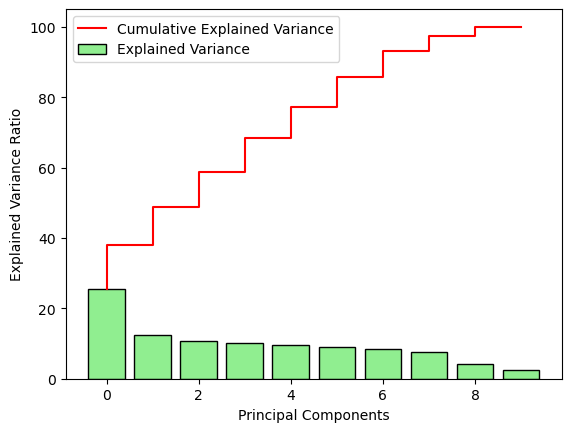

In [29]:
# covariance matrix
covariance_matrix = np.cov(scaled_features.T)

# eigen values and eigen vector
eigen_vals, eigen_vectors = np.linalg.eig(covariance_matrix)

# scree plot
total = sum(eigen_vals)
variance_explained = [(i / total) * 100 for i in sorted(eigen_vals, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

# Diagram
plt.bar(range(len(variance_explained)), variance_explained, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(len(cumulative_variance_explained)), cumulative_variance_explained, color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

- The scree plot saturates between 7 or 8 principal components (we see that 90-95% of the data can be be explained by 8 or 9 principal components)
- Proceeding with 7 principal components

In [30]:
# Fitting the PCA model
pca=PCA(n_components = 7)
pca.fit(scaled_features_df)

PCA(n_components=7)

In [31]:
# transforming scaled data to principal components.
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.250884,-0.890272,0.420216,1.138684,1.497569,0.445469,-0.449988
1,-0.616515,-0.688831,0.459620,-0.414393,-0.973242,1.389405,-1.002973
2,-0.511811,0.206310,0.398023,-0.102889,-1.220037,0.169800,-0.257143
3,0.678728,-1.224224,-1.227608,1.038633,0.769126,-1.007338,-0.428978
4,-0.042046,0.297767,1.525969,-0.105074,-1.594685,-2.391926,-1.426745


### 15. Apply K-means clustering and segment the data
   - a. Find the optimal K Value using elbow plot for K Means clustering.
   - b. Build a Kmeans clustering model using the obtained optimal K value
         from the elbow plot.
   - c. Compute silhouette score for evaluating the quality of the K Means
       clustering technique.

In [32]:
# Define the range of cluster numbers to explore
cluster_range = range(2, 15)

# Create an empty list to store the cluster errors for each number of clusters
cluster_errors = []

# Iterate over each number of clusters in the defined range
for num_clusters in cluster_range:
   
    # Initialize KMeans clustering with the current number of clusters and a random state for reproducibility
    clusters = KMeans(num_clusters, random_state=100)
    
    # Fit the KMeans model to the PCA-transformed data
    clusters.fit(data_pca)
    
    # Calculate the inertia, which represents the sum of squared distances of samples to their closest cluster center
    cluster_errors.append(clusters.inertia_)

# Create a DataFrame to store the number of clusters and their corresponding cluster errors
clusters_df = pd.DataFrame({'num_clusters': cluster_range, 
                             'cluster_errors': cluster_errors})

# Display the DataFrame containing the number of clusters and their corresponding errors
clusters_df

,num_clusters,cluster_errors
0,2,1.278770e+06
1,3,1.154943e+06
2,4,1.050437e+06
3,5,9.607138e+05
4,6,9.069597e+05
5,7,8.620104e+05
6,8,8.298220e+05
7,9,8.004637e+05
8,10,7.745647e+05
9,11,7.507739e+05


Text(0, 0.5, 'Error')

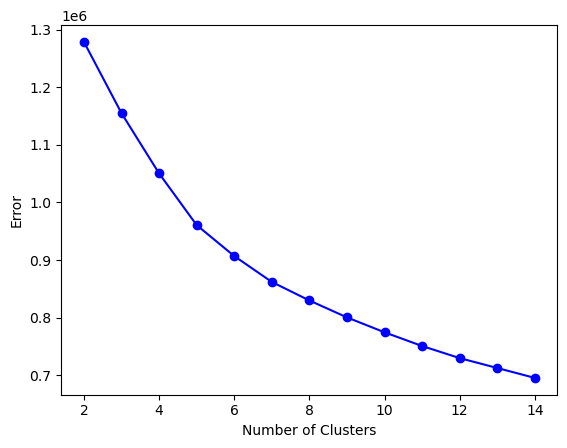

In [33]:
# elbow plot
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')

- We can see from this plot that the optimum k value is between 4 - 6.
- proceeding with 4 clusters

In [34]:
# Applying KMeans
# Fitting the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=4, random_state=100)

- The dataset i huge. so to reduce computational time, we will be taking 10% of the scaled dataset to calculate the 
  silhoutte score

In [35]:
# library to take a sample size of the scaled dataset
from sklearn.utils import shuffle

# Take a random sample of 10% of the scaled features data
sampled_scaled_features_df = shuffle(scaled_features_df, random_state=42).sample(frac=0.1, random_state=42)

for i in range(2, 15):
    # Initialize Kmeans Clustering with the current number of clusters (i)
    kmeans_cl = KMeans(n_clusters=i)
    
    # Fit the Kmeans Clustering model to the sampled scaled features data
    kmeans_cl = kmeans_cl.fit(sampled_scaled_features_df)
    
    # Predict the cluster labels for each data point in the sampled data
    labels = kmeans_cl.fit_predict(sampled_scaled_features_df)
    
    # Compute the silhouette score for the clustering result on the sampled data
    score = silhouette_score(sampled_scaled_features_df, labels)
    
    # Print the number of clusters and the corresponding silhouette score
    print(i, score)

2 0.1538090381868034
3 0.1517870355802948
4 0.113884968841347
5 0.1196400293294308
6 0.1247836758774399
7 0.11119839416159452
8 0.11053225226825708
9 0.1016926935241602
10 0.10929279475660182
11 0.11075292608692154
12 0.10467402028751442
13 0.1085016322165714
14 0.09806727550193661


In [57]:
# joining the label dataframe with unscaled initial cleaned dataframe.(df_copy).
# this is done to attach labels to the dataframe records and segment the data

df_kmeans_labelled = df_copy.join(kmeans_df['Label'])
df_kmeans_labelled.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Label
0,fit,34d,137.0,10.0,vacation,hourglass,romper,5.666667,14,28.0,1.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,5.500000,12,36.0,3.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,5.416667,8,34.0,1.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,5.750000,12,27.0,1.0
5,fit,32b,138.0,8.0,date,athletic,dress,5.666667,8,45.0,3.0


Text(0.5, 1.0, 'Visualization of the Clusters')

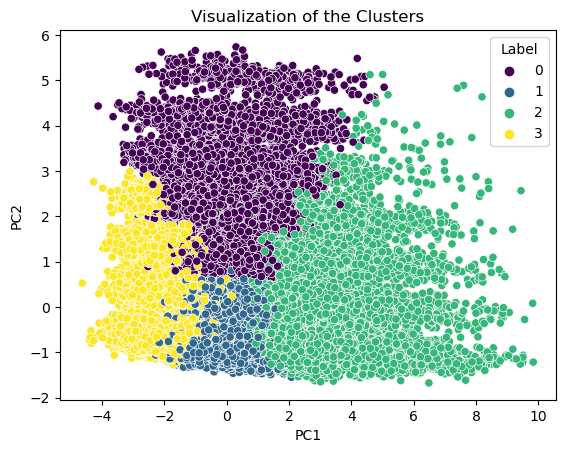

In [40]:
# visualizing the clusters
sns.scatterplot(data=kmeans_df, x='PC1', y='PC2', hue='Label', palette='viridis')
plt.title('Visualization of the Clusters')

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 
  - a. Find the optimal K Value using dendrogram for Agglomerative clustering.
  - b. Build a Agglomerative clustering model using the obtained optimal K
         value observed from dendrogram.
  - c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. 

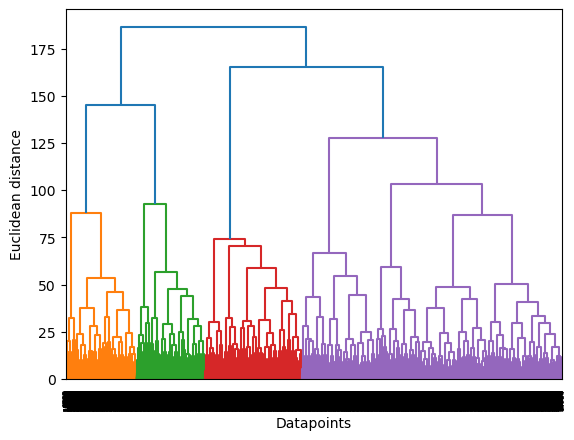

In [44]:
# Compute the hierarchical clustering linkage matrix using Ward's method
# to save computation time, a sample size we used earlier will be used here too
merg = linkage(sampled_scaled_features_df, method='ward')

# Plot the dendrogram using the hierarchical clustering linkage matrix
dendrogram(merg, leaf_rotation=90)

# Display the dendrogram
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

- The dendrogram suggests the existense of 4 clusters. So, proceeding to Agglomerative Model building using 4 clusters

In [46]:
# Initialize AgglomerativeClustering with the optimum number of clusters and linkage method
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the AgglomerativeClustering model to the scaled features data
hierarchical_cluster_model = hierarchical_cluster.fit(sampled_scaled_features_df)

In [48]:
# silhouette score

for i in range(2, 15):
    # Initialize AgglomerativeClustering with the current number of clusters (i)
    hierarchical_cl = AgglomerativeClustering(n_clusters=i)
    
    # Fit the AgglomerativeClustering model to the scaled features data
    hierarchical_cl = hierarchical_cl.fit(sampled_scaled_features_df)
    
    # Predict the cluster labels for each data point
    labels = hierarchical_cl.fit_predict(sampled_scaled_features_df)
    
    # Compute the silhouette score for the clustering result
    score = silhouette_score(sampled_scaled_features_df, labels)
    
    # Print the number of clusters and the corresponding silhouette score
    print(i, score)

2 0.13122140928274229
3 0.11383672430751783
4 0.11867879847089038
5 0.08249387621060768
6 0.07400978884007021
7 0.07977273294443689
8 0.07727131865733801
9 0.056060612663226546
10 0.05893081507198089
11 0.06566404814329847
12 0.06556875919332396
13 0.06508521124841155
14 0.06748277805973989


In [54]:
## Creating a dataframe of the labels
hier_label_df = pd.DataFrame(hierarchical_cluster_model.labels_,columns=['Labels'])
hier_label_df.head(5)

,Labels
0,0
1,0
2,3
3,1
4,0


In [55]:
# joining the label dataframe with unscaled initial cleaned dataframe.(df_copy).
# this is done to attach labels to the dataframe records and segment the data

df_hierarchical = df_copy.join(hier_label_df)
df_hierarchical.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,5.666667,14,28.0,0.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,5.500000,12,36.0,0.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,5.416667,8,34.0,1.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,5.750000,12,27.0,0.0
5,fit,32b,138.0,8.0,date,athletic,dress,5.666667,8,45.0,2.0


## ● Conclusion : 
### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

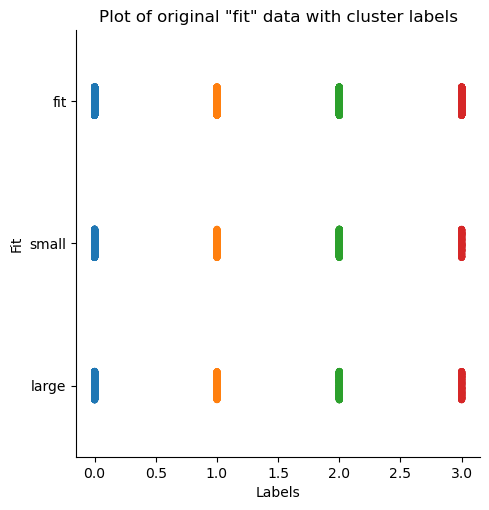

In [69]:
# Cat plot of the 'fit' data vs 'cluster labels' colored by cluster labels
sns.catplot(x='Labels', y='fit', hue='Labels', data=df_hierarchical, palette='tab10')
plt.title('Plot of original "fit" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Fit')
plt.show()

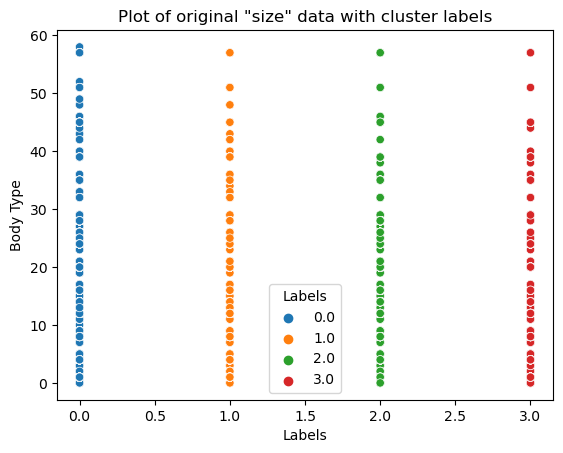

In [68]:
# Cat plot of the 'size' data vs 'cluster labels' colored by cluster labels
sns.scatterplot(x='Labels', y='size', hue='Labels', data=df_hierarchical, palette='tab10')
plt.title('Plot of original "size" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Body Type')
plt.show()

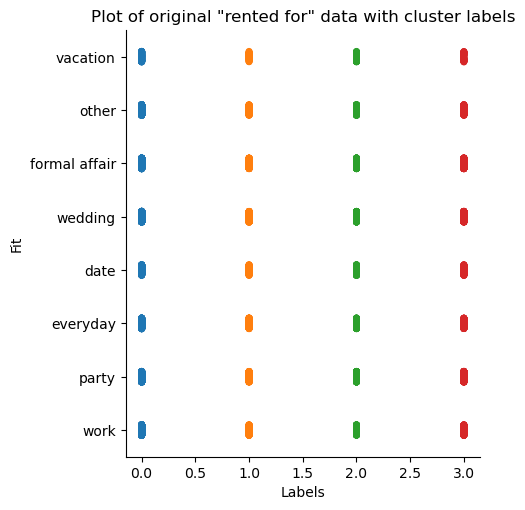

In [70]:
# Cat plot of the 'rented for' data vs 'cluster labels' colored by cluster labels
sns.catplot(x='Labels', y='rented for', hue='Labels', data=df_hierarchical, palette='tab10')
plt.title('Plot of original "rented for" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Fit')
plt.show()

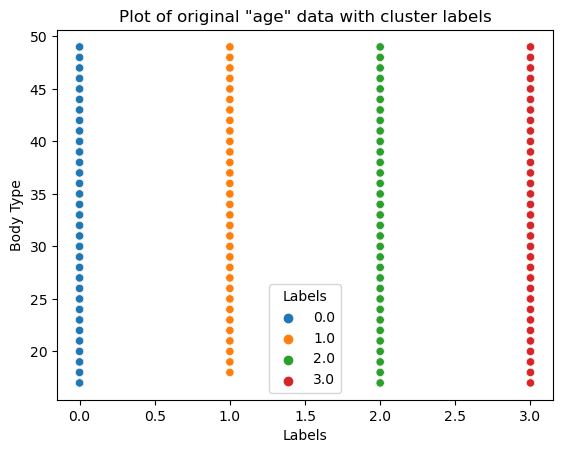

In [71]:
# Cat plot of the 'age' data vs 'cluster labels' colored by cluster labels
sns.scatterplot(x='Labels', y='age', hue='Labels', data=df_hierarchical, palette='tab10')
plt.title('Plot of original "age" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Body Type')
plt.show()

### Data Interpretation

- Based on the cluster analysis and bivariate analysis between cluster labels and different features, here are some 
  possible conclusions:

1. Age Distribution Across Clusters:
    - Cluster 0 primarily consists of younger individuals, with the majority falling in the age range of 20-30 years.
    - Cluster 1 shows a more diverse age distribution, with a higher proportion of individuals in the 30-40 age range.
    - Cluster 2 predominantly comprises older individuals, with a significant number aged 40-50 years and above.
    - Cluster 3 exhibits a relatively uniform distribution across different age groups.

2. Rating Distribution Across Clusters:
    - Clusters display varying patterns in terms of product ratings. For example, Cluster 0 shows a higher concentration 
      of lower - ratings (e.g., below 5), while Cluster 3 demonstrates a higher proportion of higher ratings (e.g., above 7).
    - Clusters 1 and 2 exhibit relatively similar rating distributions, with a mix of moderate to high ratings.

3. Body Type and Category Preferences:
    - Cluster 0 and Cluster 1 tend to prefer certain categories of products (e.g., dresses, tops) and have a higher 
      proportion of individuals with specific body types (e.g., hourglass, pear).
    - Cluster 2 and Cluster 3 show different preferences in terms of product categories and body types, indicating 
       distinct fashion preferences or needs.
       
4. Rented For Preferences:
    - There are variations in the purposes for which individuals rent clothing across clusters. For example, Cluster 0 may 
      rent primarily for casual occasions, while Cluster 3 may focus more on formal or special events.
      
5. Weight and Size Distribution:
    - Different clusters may have distinct distributions of weight and clothing sizes, reflecting varying body sizes 
      and preferences among different demographic segments.

- Overall Insights:
    - The clustering results suggest that the customer base can be segmented into distinct groups based on 
       demographic characteristics, preferences, and behaviors.
     - These insights can inform marketing strategies, product recommendations, and inventory management decisions tailored 
        to the specific needs and preferences of each cluster.

### Project Conclusions

- In this case study, we have attempted to cluster rentherunway dataset using K-means and agglomerative clustering and we also reduced the dimensionality of the dataset using PCA.
- We came up with 4 clusters using K-means and 4 clusters using agglomerative clustering.
- Although selection of the clusters can be revised using Silhoutte score but for a general introductory part it is okay to visualize the plot (either elbow graph or dendrograms) and come up with a particular clusters size.
- Further, we can also do the cluster analysis by doing bivariate analysis between cluster labels and different features and understand the characteristics of different groups.

-----
## Thank You!
-----